In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%load_ext watermark
%watermark -iv

pandas      0.22.0
matplotlib  2.2.2



In [3]:
df = pd.read_excel('reading.xlsx')
df.tail()

,Title,Author,Type,Read,Published,Pages,Notes,Reflection
500,Consuming the Word: The New Testament and The ...,Scott Hahn,Audiobook,2018,2013.0,176.0,Yes,Scott Hahn is characteristically cogent and de...
501,Being Jazz: My Life as a (Transgender) Teen,Jazz Jennings,Audiobook,2018,2017.0,272.0,No,I read this to balance my reading of Ryan Ande...
502,When Harry Became Sally: Responding to the Tra...,Ryan T. Anderson,Library,2018,2018.0,213.0,Yes,Anderson provides a thorough examination of tr...
503,Gaudete et Exsultate: On the Call to Holiness ...,Pope Francis,PDF,2018,2018.0,38.0,Yes,"This was the center of our first small group, ..."
504,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,Audiobook,2018,2018.0,312.0,No,Comey leaves no doubt about his deeply negativ...


In [4]:
table = pd.pivot_table(df,
                       index=['Type'],
                       columns=['Read'],
                       values=['Title'],
                       margins=True,
                       margins_name='Total',
                       aggfunc=[len])
table.columns = table.columns.droplevel(1)
table.columns = table.columns.droplevel(0)
table.fillna('')

Read,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Type,,,,,,,,,,,,,,
Audiobook,,,,,,5,,1,5,10,43.0,52.0,17,133
Book,13,14,17,22,26,19,31,36,33,25,23.0,29.0,6,294
Library,,,,,,,,3,4,1,7.0,10.0,11,36
PDF,,,,,,,,2,6,5,5.0,2.0,2,22
eBook,,,,,,,,,,,10.0,10.0,,20
Total,13,14,17,22,26,24,31,42,48,41,88.0,103.0,36,505


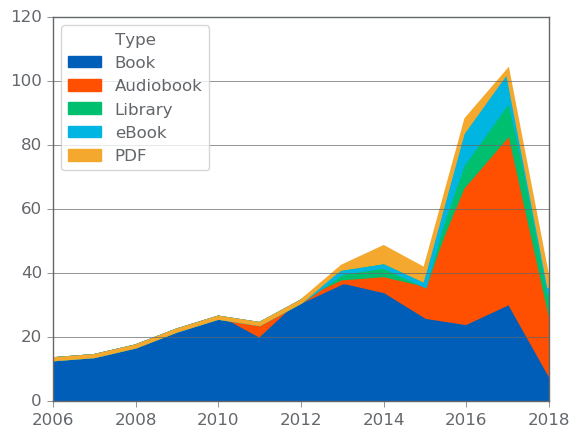

In [6]:
dfPlot = (df
 .groupby(['Read','Type'])
 .size()
 .unstack()
)
dfPlot = dfPlot[['Book','Audiobook','Library','eBook','PDF']]
dfPlot.plot.area()

plt.style.use('mag')
plt.gca().set_xlabel('')
plt.gca().xaxis.grid(False)
# plt.savefig('chart.png', dpi = 350)